In [14]:
A =[1,2,3,4,5,6]
B =[13,21,34]
A_B = A.extend(B)
print(A)

[1, 2, 3, 4, 5, 6, 13, 21, 34]


In [16]:
my_list =['geeks','for']
another_list =[6,0,1,4]
my_list1 =my_list.extend(another_list)
print(my_list1)

None


In [17]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [18]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [1]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset as fuel_data
fuel_data = pd.read_csv("C:\\Users\\D\\Downloads\\HDSC-StageOneDataset")
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [25]:
# to know the shape of fuel_data
print('shape of fuel data {}'.format(fuel_data.shape))

shape of fuel data (29523, 11)


In [19]:
#To get basic statistical variables of the numerical features of fuel_data like mean,standard deviation, percentile
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [21]:
#used groupby to understand the average fuel cost per unit burned for the different fuel type code
x = fuel_data.groupby("fuel_type_code_pudl")['fuel_cost_per_unit_burned'].mean()

In [22]:
print(x)

fuel_type_code_pudl
coal         67.421830
gas          13.659397
nuclear    4955.157002
oil         168.877086
other        18.253856
waste        19.518122
Name: fuel_cost_per_unit_burned, dtype: float64


In [23]:
# to get the skewness and kurtosis for the fuel quantity burned
#(this helps to know how defiated from normal distribution our dataset is)
print("skewness:%f" % fuel_data['fuel_qty_burned'].skew())
print("kurtosis:%f" % fuel_data['fuel_qty_burned'].kurt())

skewness:15.851495
kurtosis:651.369450


In [26]:
# to know the sum of missing rows which was only in fuel unit 
fuel_data.isna().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [27]:
# to view our missing rows
df1 = fuel_data[fuel_data.isna().any(axis=1)]
df1.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
66,f1_fuel_1994_12_9_3_13,9,1994,mickleton,oil,NaN,3547.0,5.606160,41.930,41.77,7.480
152,f1_fuel_1994_12_8_1_14,8,1994,ar nuclear one,nuclear,NaN,43461380.0,3.412600,1.654,0.00,0.485
277,f1_fuel_1994_12_74_0_3,74,1994,perry k & w,other,NaN,2654942.0,0.100000,0.044,0.00,0.440
626,f1_fuel_1994_12_117_0_1,117,1994,nine mile unit 1,nuclear,NaN,401216.0,0.127467,78.446,0.00,0.615
627,f1_fuel_1994_12_117_0_4,117,1994,nine mile unit 2,nuclear,NaN,313736.0,0.119756,57.534,0.00,0.480


In [28]:
# to see the different types of fuel unit
fuel_data["fuel_unit"].unique()

array(['ton', 'mcf', 'kgU', 'bbl', 'gramsU', nan, 'mwdth', 'mmbtu',
       'mwhth', 'gal'], dtype=object)

In [32]:
# to get the count of the fuel unit per fuel type code
x = fuel_data.groupby("fuel_type_code_pudl")["fuel_unit"].value_counts()
print(x)

fuel_type_code_pudl  fuel_unit
coal                 ton           8438
                     mmbtu           52
                     mcf              5
                     bbl              1
gas                  mcf          11333
                     mmbtu           94
                     ton              4
                     bbl              2
nuclear              gramsU         464
                     kgU            110
                     mwhth          100
                     mwdth           95
                     mmbtu           34
oil                  bbl           7952
                     gal             81
                     mcf              7
                     ton              3
other                ton             77
                     bbl             42
                     mcf              9
                     gal              3
waste                ton            436
                     bbl              1
Name: fuel_unit, dtype: int64


In [33]:
# to replace the missing fuel unit by the mode of each fuel type code
fuel_data['fuel_unit']=fuel_data.groupby('fuel_type_code_pudl').fuel_unit.apply(lambda x:x.fillna(x.mode()[0]))

In [34]:
# to see if there is any other missing variables 
fuel_data.isna().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

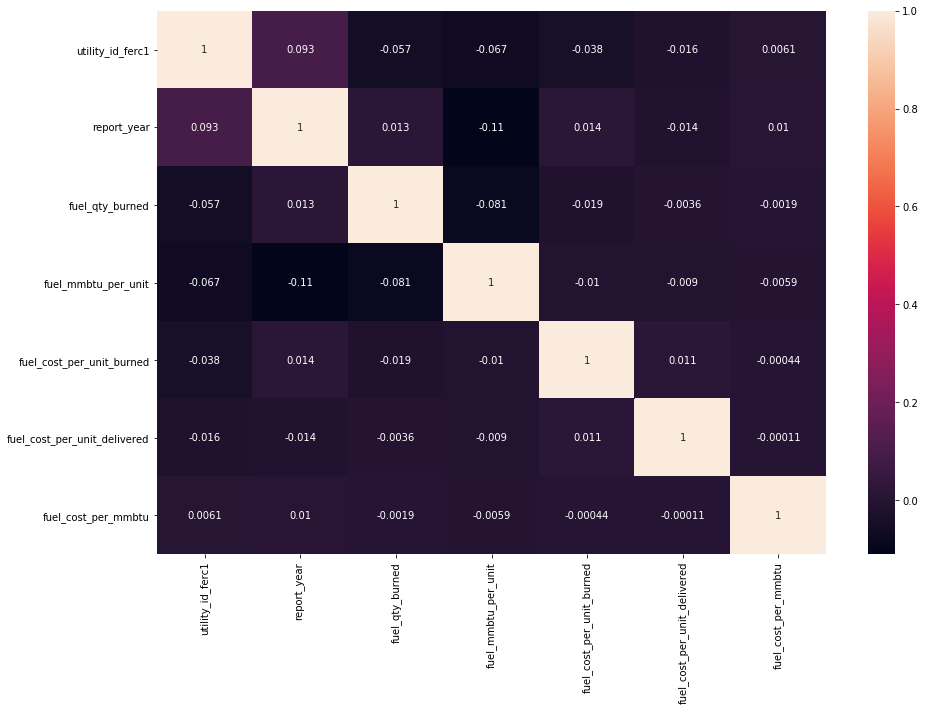

In [35]:
# to visualize the correlation between variables in fuel_data
plt.figure(figsize = (15,10))
sns.heatmap(fuel_data.corr(), annot = True)

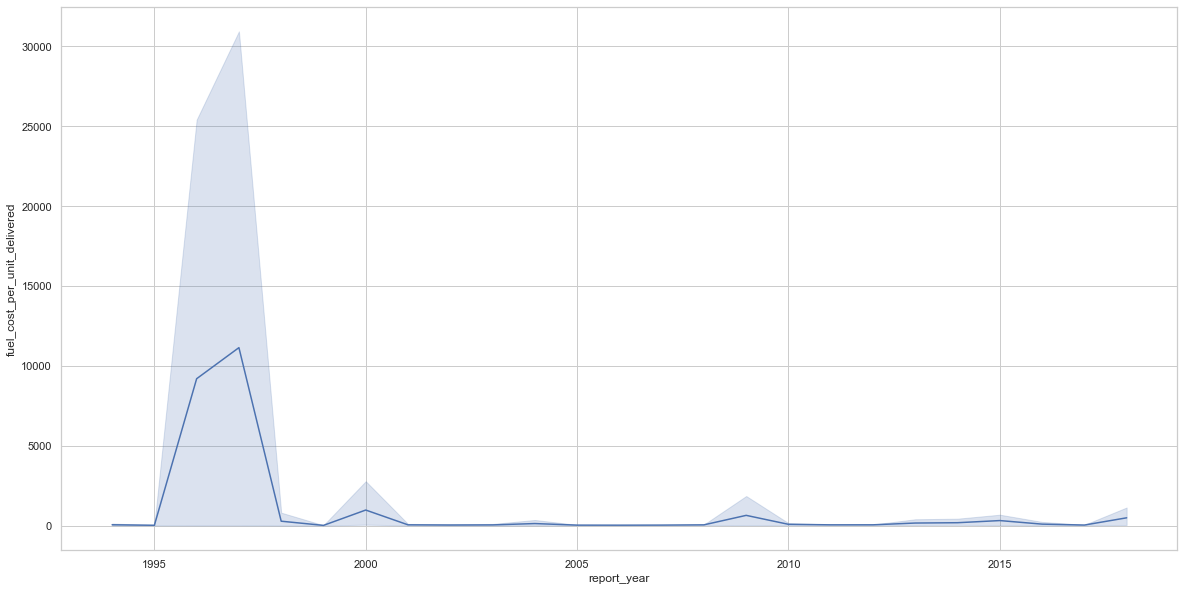

In [36]:
sns.set(style="whitegrid") # to give the graphs a particular design
plt.rc('figure', figsize=(20, 10))
sns.lineplot(x ="report_year", y= "fuel_cost_per_unit_delivered", data = fuel_data)

In [37]:
# used a pivot chart to see average fuel cost per unit cost in  the differnt years depending on the fuel type
pd.pivot_table(fuel_data, index =["fuel_type_code_pudl","report_year"], values= "fuel_cost_per_unit_burned", aggfunc=[np.mean,np.median])

mean  \
                                fuel_cost_per_unit_burned   
fuel_type_code_pudl report_year                             
coal                1994                        31.546467   
                    1995                        30.677442   
                    1996                        29.454299   
                    1997                       104.897309   
                    1998                        27.616234   
...                                                   ...   
waste               2014                        32.866333   
                    2015                        34.959444   
                    2016                        31.710529   
                    2017                        30.138600   
                    2018                        41.310750   

                                                   median  
                                fuel_cost_per_unit_burned  
fuel_type_code_pudl report_year                            
coal                1994                           32.750  
                    1995                           30.900  
                    1996                           29.231  
                    1997                           28.638  
                    1998                           27.438  
...                                                   ...  
waste               2014                           33.145  
                    2015                           33.770  
                    2016                           32.380  
                    2017                           29.629  
                    2018                           30.080  

[148 rows x 2 columns]